In [1]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Tesla revenue data URL
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Fetch and parse HTML
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Find the revenue table
tables = soup.find_all("table")

# Extract data from the table
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for table in tables:
    for row in table.find_all("tr"):
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            tesla_revenue = pd.concat(
                [tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})],
                ignore_index=True
            )

# Clean the data
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue.dropna(inplace=True)

# Display last 5 rows
tesla_revenue.tail()




,Date,Revenue


In [3]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [4]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in soup.find_all("table"):
    for row in table.find_all("tr"):
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

gme_revenue.dropna(inplace=True)
gme_revenue.tail()

,Date,Revenue


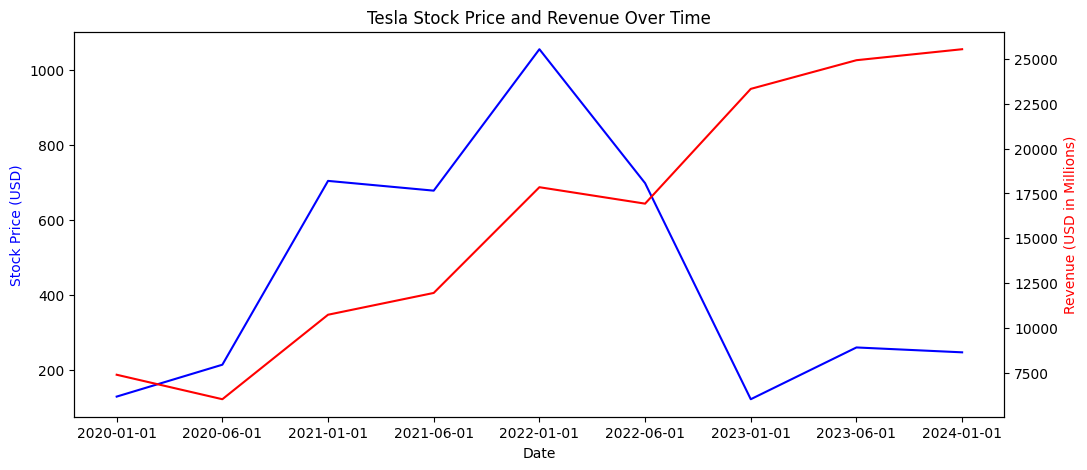

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV files
tesla_data = pd.read_csv("tesla_stock.csv")
tesla_revenue = pd.read_csv("tesla_revenue.csv")

# Plot both datasets
fig, ax1 = plt.subplots(figsize=(12,5))

ax2 = ax1.twinx()
ax1.plot(tesla_data["Date"], tesla_data["Close"], color="blue", label="Tesla Stock Price (USD)")
ax2.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], color="red", label="Tesla Revenue (USD in Millions)")

ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price (USD)", color="blue")
ax2.set_ylabel("Revenue (USD in Millions)", color="red")
plt.title("Tesla Stock Price and Revenue Over Time")

plt.show()


In [ ]:
make_graph(gme_data, gme_revenue, "GameStop")